In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd
from ipywidgets import interact
import seaborn as sns
import ptitprince as pt
import re #I import this library 'cause I need to deal with regular expressions
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer # para usar Yeo-Johnson
from scipy.stats import skew
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
#Here I call the files of my second dataset in order to use it on the CoderHouse data science project
file1="bands.csv"
file2="reviews.csv"
file3="albums.csv"

#Here I read the csv files and define the dataframes
bands=pd.read_csv(file1)
reviews=pd.read_csv(file2)
albums=pd.read_csv(file3)
Spotify_file='Spotify_extracted.csv'
Spotify_df=pd.read_csv(Spotify_file)
newDb="death_metal.csv"
newDBdf=pd.read_csv(newDb)

In [5]:
bands

,id,name,country,status,formed_in,genre,theme,active
0,1,('M') Inc.,United States,Unknown,2009.0,Death Metal,NaN,2009-?
1,2,(sic),United States,Split-up,1993.0,Death Metal,NaN,1993-1996
2,3,.F.O.A.D.,France,Active,2009.0,Death Metal,Life and Death,2009-present
3,4,100 Suns,United States,Active,2004.0,Death Metal,NaN,2004-present
4,5,12 Days of Anarchy,United States,Split-up,1998.0,Death Metal,Anarchy,1998-2002
...,...,...,...,...,...,...,...,...
37718,37719,Gladiator,Slovakia,Active,1988.0,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...,Sorrow| Nuclear War| Doom,1988-present
37719,37720,Innersight,Hungary,Active,1997.0,Post-Rock (early)| Progressive Death Metal (mi...,NaN,1997-present
37720,37721,Lunarsapian,International,Active,2008.0,Black/Death/Doom Metal (early)| Drone/Dark Amb...,NaN,2008-present
37721,37722,Subconscious,Germany,Active,1990.0,Progressive Thrash/Death Metal (1992| 2002-pre...,NaN,1990-1997| 2002-present


In [6]:
reviews

,id,album,title,score,content
0,1,4,The Killer Count Just Keeps Rising,0.88,When I first threw this on I really didnt know...
1,2,5,A gem of heterogeneous death metal...,0.96,Several years ago I bought from a band member|...
2,3,8,Fantasic| if mostly for its influences,0.83,What a wonderful release this is. ‘Vox Fatum’ ...
3,4,45,A rare| lost hidden gem,0.80,Picture this: crushing| brutal death metal| wi...
4,5,54,Pure| but flayed and covered in soot,0.92,Abhordium's When Depravity Incarnates is an ex...
...,...,...,...,...,...
21505,21506,28061,Delightful,0.89,What can a man accomplish in two years? Well| ...
21506,21507,28065,Frozen Mist White Noise Paranormal,0.80,Every now and then I stumble upon a really coo...
21507,21508,28065,Terrifying experimental death metal,0.80,Crawling out from Montoursville Pennysylvania ...
21508,21509,28066,Frozen Mist Anomalies Of The Forest,0.80,Deep in the mountain forest of Pennsylvania lu...


In [11]:
reviews.duplicated(subset='id',keep='first').sum()

0

In [7]:
albums

,id,band,title,year
0,1,1,Taste the Hate,2014
1,2,3,The Bringer of Death,2014
2,3,4,Deception| Calculate What You Can't See,2005
3,4,7,Inti Huacay,1998
4,5,7,Génesis & horror,2002
...,...,...,...,...
28064,28065,37723,White Noise Paranormal,2010
28065,28066,37723,Anomalies of the Forest,2011
28066,28067,37723,Mother Earth Pantheon,2012
28067,28068,37723,Paganwinds,2014


In [8]:
Spotify_df

,Name,Genres,Popularity,Followers,Artist_URI
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk
1,Gojira,"alternative metal, french death metal, french ...",61,1239549,spotify:artist:0GDGKpJFhVpcjIGF8N6Ewt
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu
3,In Flames,"alternative metal, gothenburg metal, melodic d...",61,1127923,spotify:artist:57ylwQTnFnIhJh4nu4rxCs
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF
...,...,...,...,...,...
995,Cleansing of the Temple,"christian death metal, christian deathcore",5,1315,spotify:artist:4nNgrGNSI4M9ODTMH5MdNI
996,Sentient Horror,swedish death metal,7,6037,spotify:artist:4MNbashXmMvEKIre76REzX
997,Purulence,"british death metal, slam death metal",6,2317,spotify:artist:6n2vNeCnk8otr3DpmS6osE
998,Emasculated Vituperation,slam death metal,7,916,spotify:artist:6JWlwpjP9WMxELrxX73n4h


In [9]:
newDBdf

,artist,asin,media,review_count,star_rating,title,year,Unnamed: 7
0,Ministry,B006NTPEXA,"MP3 Music,Audio CD",680,4.8,Psalm 69,1992,NaN
1,Mercyful Fate,B004ZW1OW2,"Vinyl,MP3 Music,Audio CD",678,4.8,Don't Break The Oath (Picture Disc),1984,NaN
2,Gojira,B00F8PPADE,"Vinyl,MP3 Music,Audio CD",633,4.8,Way of All Flesh,2013,NaN
3,Carcass,B000024AZV,"Audio CD,MP3 Music,Vinyl,Audio, Cassette",626,4.8,Heartwork,2013,NaN
4,Suicidal Tendencies,B004WQZP1M,"MP3 Music,Audio CD",611,4.8,Suicidal Tendencies (Original Vinyl Edition),1983,NaN
...,...,...,...,...,...,...,...,...
6305,VARIOUS ARTISTS,B009EFHM30,Audio CD,6,3.4,Gothic Spirits 16 / Various,2013,NaN
6306,Saturnus,B0077U70LI,"Audio CD,Audio CD",6,3.4,For The Loveless Lonely Nights 2010 Re-release,2012,NaN
6307,Valensia,B000P159AU,Audio CD,6,3.4,Voodoo Music Box,NaN,NaN
6308,Spitfire,B00000IKIL,"Audio CD,MP3 Music",11,3.3,The Dead Next Door,1999,NaN


In [10]:
bands.loc[bands['name']=='Masacre']

,id,name,country,status,formed_in,genre,theme,active
5752,5753,Masacre,Colombia,Active,1988.0,Death Metal,Colombian Violence| War| Anti-Religion,1988-present
23446,23447,Masacre,Finland,Split-up,NaN,Death/Thrash Metal,NaN,NaN


In [22]:
reviews.loc[reviews['album']==3260]

,id,album,title,score,content
2651,2652,3260,Death Reigns Supreme,0.81,In issuing a suitably battering assault that r...
2652,2653,3260,These guys know what they are doing!,0.92,Masacre is maybe the most important colombian ...


In [21]:
albums.loc[albums['title']=='Total Death']

,id,band,title,year
3259,3260,5753,Total Death,2004
23305,23306,34134,Total Death,2015
26544,26545,37094,Total Death,1996


<Axes: xlabel='album', ylabel='score'>

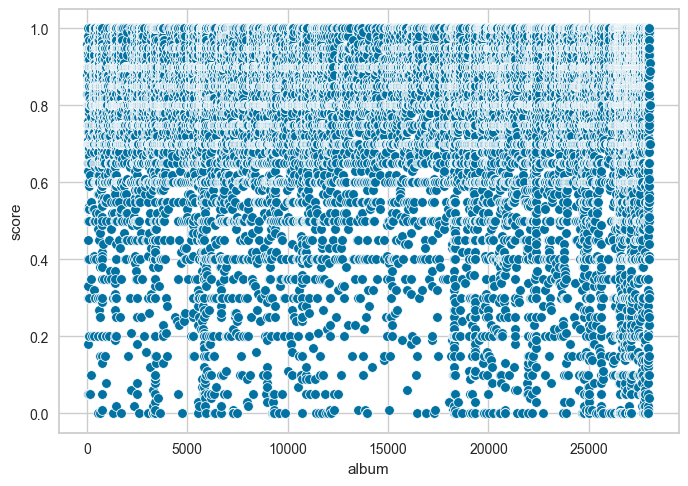

In [23]:
sns.scatterplot(data=reviews,x='album',y='score')

In [24]:
bands.columns

Index(['id', 'name', 'country', 'status', 'formed_in', 'genre', 'theme',
       'active'],
      dtype='object')

In [25]:
Spotify_df.columns

Index(['Name', 'Genres', 'Popularity', 'Followers', 'Artist_URI'], dtype='object')

In [26]:
newDBdf.columns

Index(['artist', 'asin', 'media', 'review_count', 'star_rating', 'title',
       'year', 'Unnamed: 7'],
      dtype='object')

In [27]:
bands.loc[bands['status']=='Split-up']

,id,name,country,status,formed_in,genre,theme,active
1,2,(sic),United States,Split-up,1993.0,Death Metal,NaN,1993-1996
4,5,12 Days of Anarchy,United States,Split-up,1998.0,Death Metal,Anarchy,1998-2002
8,9,6 Feet Under,Germany,Split-up,NaN,Death Metal,NaN,NaN
10,11,7th Delirium,Spain,Split-up,1998.0,Death Metal,NaN,1998-?
11,12,7th Gate,Austria,Split-up,NaN,Death Metal,NaN,NaN
...,...,...,...,...,...,...,...,...
37703,37704,Kalögena,Germany,Split-up,1993.0,Death/Thrash Metal with Gothic influences (ear...,Fun| Social| Fantasy| Horror,1993-?
37705,37706,Massacra,France,Split-up,1986.0,Death/Thrash Metal (1986-1992)| Heavy/Thrash M...,Genocide| Killing| Violence| Destruction,1986-1997
37710,37711,St. Valentine's Day,Ukraine,Split-up,NaN,Doom/Death Metal (early)| Doom/Post-Metal/Elec...,NaN,NaN
37713,37714,Theatre of Tragedy,Norway,Split-up,1993.0,Gothic/Doom/Death Metal (early)| Industrial/El...,Beauty| Darkness| Love| Life,1993 (as Suffering Grief)| 1993 (as La Reine N...


In [28]:
BANDS_DF=bands[['id','name','country','status','genre',]]

In [29]:
BANDS_DF

,id,name,country,status,genre
0,1,('M') Inc.,United States,Unknown,Death Metal
1,2,(sic),United States,Split-up,Death Metal
2,3,.F.O.A.D.,France,Active,Death Metal
3,4,100 Suns,United States,Active,Death Metal
4,5,12 Days of Anarchy,United States,Split-up,Death Metal
...,...,...,...,...,...
37718,37719,Gladiator,Slovakia,Active,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...
37719,37720,Innersight,Hungary,Active,Post-Rock (early)| Progressive Death Metal (mi...
37720,37721,Lunarsapian,International,Active,Black/Death/Doom Metal (early)| Drone/Dark Amb...
37721,37722,Subconscious,Germany,Active,Progressive Thrash/Death Metal (1992| 2002-pre...
